# Исследование о продажах компьютерных игр в интернет-магазине

Мы - интернет-магазин «Стримчик», который продает компьютерные игры пользователям по всему миру. Нам необходимо спланировать рекламную кампанию на 2017 год. Для этого у нас есть открытые данные прошлых лет, вплоть до 2016 года. В этих данных содержатся сведения о продажах игр, оценках пользователей и экспертов, жанрах и платформах. Нам необходимо выявить определяющие успешность игры закономерности, так как это позволит сделать ставку на потенциально популярный продукт.

Перед тем, как проводить исследование, откроем файл с данными, и изучим общую информацию. Затем займемся предобработкой данных: приведем названия столбцов к нижнему регистру, изменим тип данных там, где это необходимо, и проверим данные на наличие пропусков. При необходимости, обработаем их. После этого, добавим в датафрейм новый столбец, который пригодится нам для расчетов и построения графиков. После чего приступим к исследовательскому анализу данных, составим портрет пользователя каждого региона и проверим гипотезы. В конце составим общий вывод, где будут отражены основные результаты исследования.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

## Шаг 1. Загрузка данных

Откроем файл с данными и изучим общую информацию о датасете.

In [ ]:
data_games = pd.read_csv('/datasets/games.csv')
print(data_games.info())
data_games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


По полученной информации мы видим, что в датафрейме имеются пропуски. Также, названия столбцов необходимо привести к нижнему регистру. В столбцах *year_of_release* и *user_score* необходимо изменить тип данных. Все это мы сделаем в следующем шаге - предобработке данных.

## Шаг 2. Предобработка данных

В первую очередь, приведем названия столбцов к нижнему регистру, для упрощения работы с ними.

In [ ]:
data_games.columns = data_games.columns.str.lower()
data_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Теперь, необходимо изменить тип данных в столбцах, где указаны год релиза и оценка пользователей. Однако, судя по общей информации, в этих столбцах имеются пропуски, из-за чего заменить тип данных будет невозможно. Поэтому, сначала обработаем пропуски, возможно, ситуация изменится.

In [ ]:
data_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Мы видим, что пропуски имеются в 6 столбцах датафрейма. При этом, пропуски в столбцах названия, года релиза и жанра наблюдаются в малом количестве, поэтому их удаление не повлияет на репрезентативность генеральной совокупности исходных данных.

In [ ]:
data_games = data_games.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)

Также на всякий случай проверим данные на наличие дубликатов.

In [ ]:
data_games.duplicated().sum()

0

Явные дубликаты отсутствуют, возможно есть неявные?

In [ ]:
data_games[data_games[['name', 'platform', 'year_of_release', 'genre']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15969,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Мы нашли один неявный дубликат, избавимся от второй записи.

In [ ]:
data_games = (data_games.drop_duplicates(subset=['name', 'platform', 'year_of_release', 'genre'], keep='first')
              .reset_index(drop=True))
data_games[data_games[['name', 'platform', 'year_of_release', 'genre']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Теперь проанализируем оставшиеся 3 столбца. Проверим их на наличие аномальных значений.

In [ ]:
data_games['critic_score'].value_counts()

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
29.0      3
20.0      3
13.0      1
17.0      1
21.0      1
Name: critic_score, Length: 81, dtype: int64

In [ ]:
data_games['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.5       2
0.5       2
0.2       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [ ]:
data_games['rating'].value_counts()

E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

В этих столбцах большое количество пропусков, поэтому заполнение их любым значением может сильно повлиять на исходные данные, исказив их. В столбце рейтинга еще сложнее - нет возможности определить, какой тип рейтинга можно присудить каждой игре. Поэтому пропуски оставим, а в столбце рейтинга - заполним значением *«unknown».*

Однако, в столбце оценок пользователей имеется необычное значение, которое встречается довольно часто - это *«tbd».* Эта аббревиатура расшифровывается как *To Be Determined* или *To Be Discussed,* что означает *«Будет определено»* или *«Выносится на обсуждение».* В целом, для нас ничего не меняется, однако, для возможности изменения типа данных в этом столбце, заменим это значение на пропуски.

In [ ]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan)
data_games['rating'] = data_games['rating'].fillna('unknown')

После всех действий снова проверим датафрейм на наличие пропусков, дабы убедиться в корректности их заполнения и удаления.

In [ ]:
data_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Мы избавились от некоторых пропусков. Они могли возникнуть вследствие того, что оценки взяты от одного или нескольких агрегаторов, и эксперты и пользователи могли пропустить некоторые игры, например, из-за их непопулярности. Пропуски в 2016 году могут возникнуть из-за того, что он не закончился, поэтому нет полных данных. Также, пропуски могли возникнуть из-за технической ошибки после переноса и формирования данных.

Теперь, после обработки пропусков, мы можем вернуться к смене типа данных.

In [ ]:
data_games['year_of_release'] = data_games['year_of_release'].astype('int')
data_games['user_score'] = data_games['user_score'].astype('float')
print(data_games.info())
data_games

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16439,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16441,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown


Последний штрих перед исследовательским анализом - создадим новый столбец с суммарными продажами по всем регионам.

In [ ]:
data_games['total_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']
data_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16439,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16441,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


Столбец был создан успешно.

Таким образом, мы провели предобработку данных: обработали пропуски, заменили тип данных в тех столбцах, в которых это было необходимо, привели названия столбцов к нижнему регистру. Также, создали новый столбец с целью удобства дальнейшего анализа. Теперь мы можем приступать непосредственно к исследовательскому анализу данных.

## Шаг 3. Исследовательский анализ данных

Посмотрим, как выпускались игры в разные годы, и определим, важны ли для нас все периоды. Для наглядности также визаулизируем полученные значения.

In [ ]:
games_for_years = data_games.groupby('year_of_release')['name'].count()
games_for_years

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

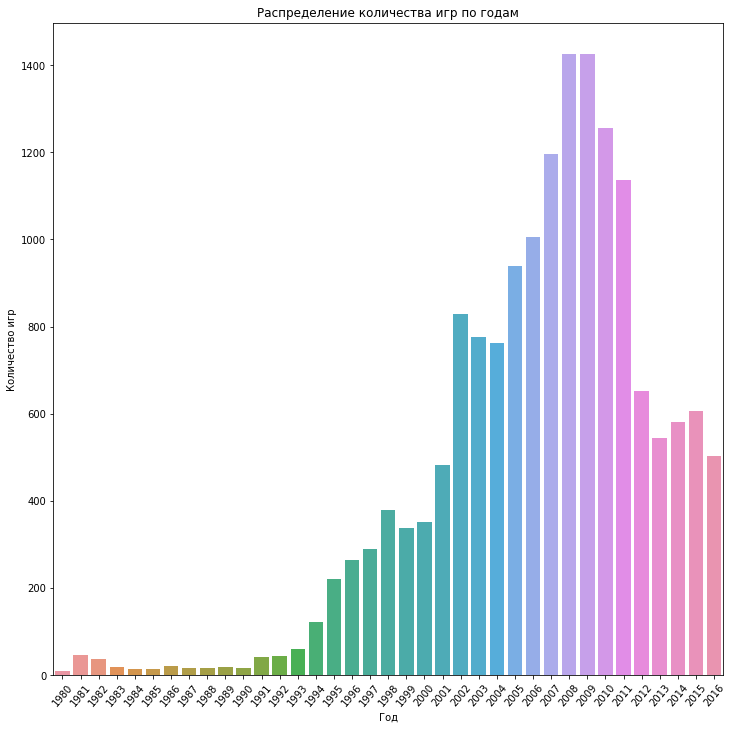

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x=games_for_years.index, y=games_for_years.values)
plt.title('Распределение количества игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.xticks(rotation=50)
plt.show()

Из полученного результата видно, что вплоть до 1993 года игры выпускались с разной частотой, и в целом их было немного. Однако, с 1994 года разработка и выпуск игр значительно выросли. Поэтому, определим этот срок как начало важного периода для нашего исследования.

Теперь посмотрим на суммарные продажи каждой платформы, и определим самые популярные.

In [ ]:
games_for_platform = data_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
games_for_platform

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

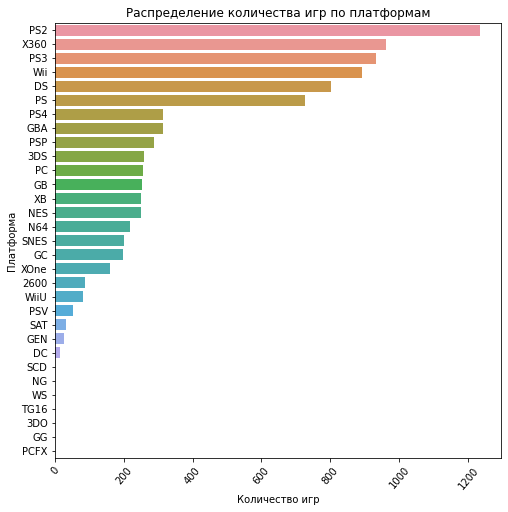

In [ ]:
plt.figure(figsize=(8, 8))
sns.barplot(x=games_for_platform.values, y=games_for_platform.index)
plt.title('Распределение количества игр по платформам')
plt.xlabel('Количество игр')
plt.ylabel('Платформа')
plt.xticks(rotation=50)
plt.show()

Мы определили суммарные продажи каждой платформы, и можем сделать вывод, что самыми популярными (по состоянию на 2016 год) являются следующие 6 платформ: *PS2, X360, Wii, PS3, DS, PS.* Возьмем эти платформы, и для каждой построим распределение суммарных продаж по годам.

### Определение суммарных продаж по годам для популярных платформ

Для удобства визуализации, создадим небольшую функцию, к которой будем обращаться для построения графика по нужной нам платформе.

In [ ]:
def platform_sales(name):
    platform_name = data_games.query('platform == @name').groupby('year_of_release')['total_sales'].sum()
    print(platform_name)
    plt.figure(figsize=(8, 8))
    sns.barplot(x=platform_name.index, y=platform_name.values)
    plt.title('Распределение суммарных продаж по годам для платформы ' + name)
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи (млн)')
    plt.xticks(rotation=50)
    plt.show()

#### Распределение суммарных продаж по годам для платформы PS2

year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    103.42
2007     75.99
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: total_sales, dtype: float64


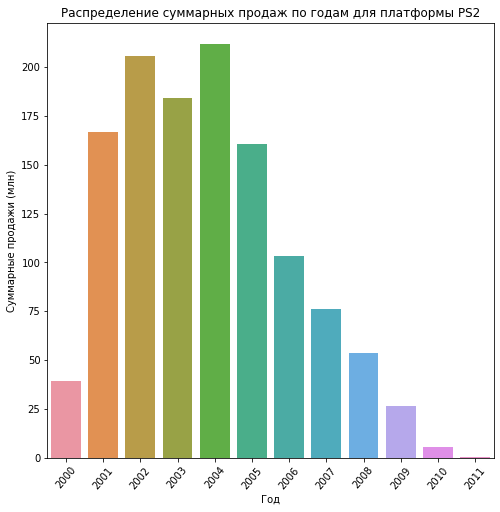

In [ ]:
platform_sales('PS2')

Мы видим, что пик продаж на этой платформе пришелся на 2001-2004 годы: в среднем 190 млн. проданных копий игр в году. Платформа появилась в 2000 году и практически мгновенно обрела популярность. Однако, начиная с 2005 года, продажи платформы начали стремительно падать вплоть до 2011 года. Это связано с тем, что технический прогресс не стоит на месте и постоянно появляются новые игровые платформы. В частности, та же PS 3-го поколения.

#### Распределение суммарных продаж по годам для платформы X360

year_of_release
2005      8.25
2006     51.62
2007     95.41
2008    135.26
2009    120.29
2010    170.03
2011    143.84
2012     99.74
2013     88.58
2014     34.74
2015     11.96
2016      1.52
Name: total_sales, dtype: float64


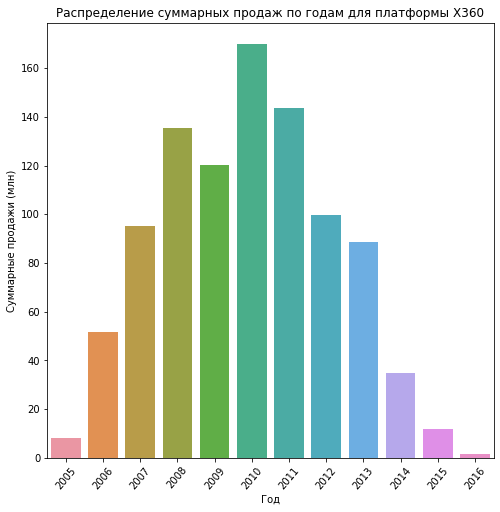

In [ ]:
platform_sales('X360')

Для данной платформы пиковый период пришелся на 2008-2011 годы: в среднем 140 млн. проданных копий игр в году. Платформа появилась в 2005 году, и, хоть и не так стремительно, как предыдущая платформа, также стала популярной у игроков. Начиная с 2011 года, вплоть до 2016 года, продажи игр на этой платформе падали.

#### Распределение суммарных продаж по годам для платформы PS3

year_of_release
2006     20.96
2007     73.19
2008    118.52
2009    130.93
2010    142.17
2011    156.78
2012    107.35
2013    113.25
2014     47.76
2015     16.82
2016      3.60
Name: total_sales, dtype: float64


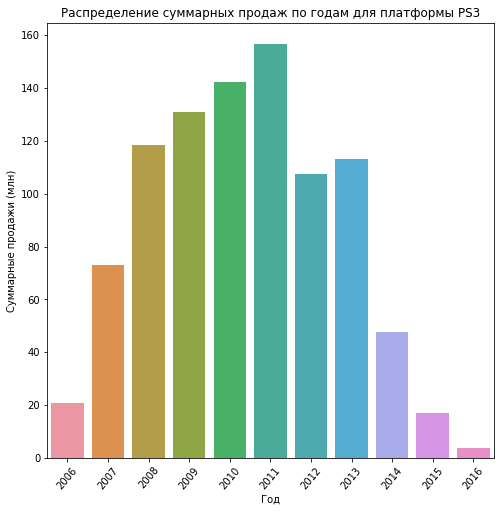

In [ ]:
platform_sales('PS3')

В сравнении со своей предшественницей, эта платформа стала популярной не слишком быстро. Пиковым можно считать период с 2008 по 2011: в среднем 135 млн. проданных копий игр в году. После 2011 года продажи упали, однако держались на хорошем уровне до 2014 года, когда они стремительно снизились, вплоть до 2016 года.

#### Распределение суммарных продаж по годам для платформы Wii

year_of_release
2006    137.15
2007    152.77
2008    171.32
2009    206.97
2010    127.95
2011     59.65
2012     21.71
2013      8.59
2014      3.75
2015      1.14
2016      0.18
Name: total_sales, dtype: float64


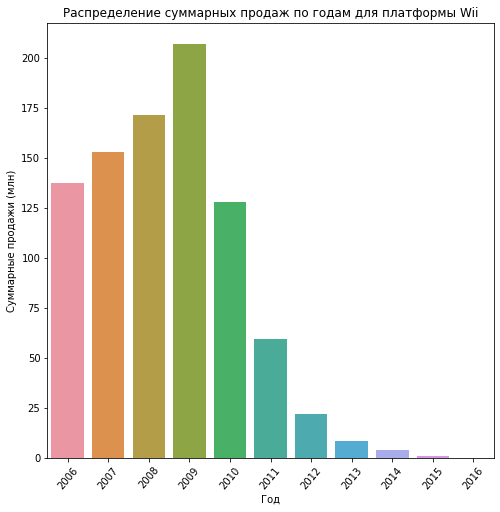

In [ ]:
platform_sales('Wii')

Платформа стала очень популярной с самого начала своего появления, в 2006 году. Пиковыми годами можно считать 2006-2009 гг.: в среднем 165 млн. проданных копий игр в году. Начиная с 2010 года, вплоть до 2016 года, продажи начали стремительно падать, и в последние годы были очень маленькими.

#### Распределение суммарных продаж по годам для платформы DS

year_of_release
1985      0.02
2004     17.27
2005    130.14
2006    119.81
2007    146.94
2008    145.31
2009    119.54
2010     85.02
2011     26.18
2012     11.01
2013      1.54
Name: total_sales, dtype: float64


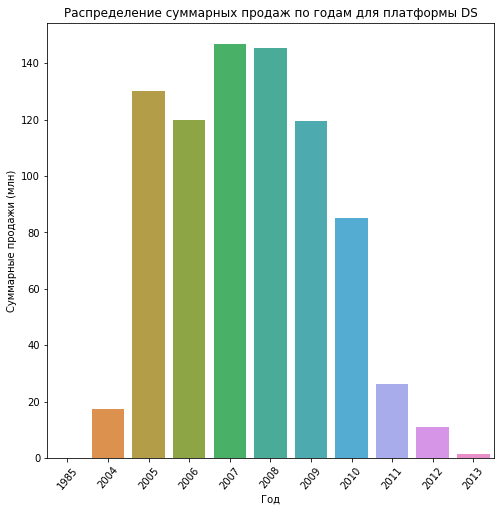

In [ ]:
platform_sales('DS')

Мы видим необычное значение - продажи в 1985 году. Однако, приставка вышла лишь в 2004 году, поэтому продаж в том году быть не могло. Поэтому, примем это значение за аномалию, и удалим его.

In [ ]:
data_games.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


year_of_release
2004     17.27
2005    130.14
2006    119.81
2007    146.94
2008    145.31
2009    119.54
2010     85.02
2011     26.18
2012     11.01
2013      1.54
Name: total_sales, dtype: float64


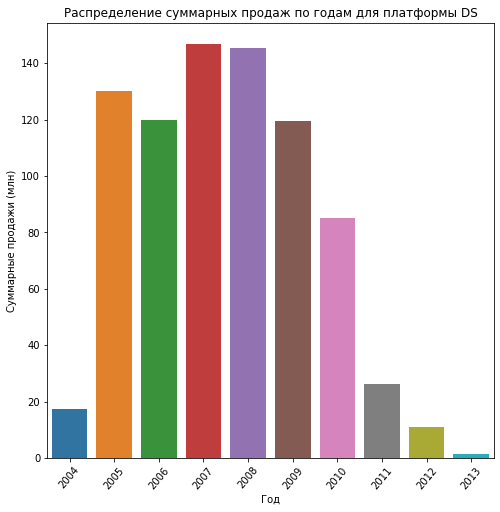

In [ ]:
data_games = data_games.drop(index=15704).reset_index(drop=True)
platform_sales('DS')

Платформа, как и говорилось выше, появилась в 2004 году, и уже в следующем году обрела огромную популярность. Пиковым можно считать период с 2005 по 2008 гг.: в среднем 135 млн. проданных копий игр в году. Начиная с 2009 года, вплоть до 2013 года, продажи начали падать.

#### Распределение суммарных продаж по годам для платформы PS

year_of_release
1994      6.03
1995     35.96
1996     94.70
1997    136.17
1998    169.49
1999    144.53
2000     96.37
2001     35.59
2002      6.67
2003      2.07
Name: total_sales, dtype: float64


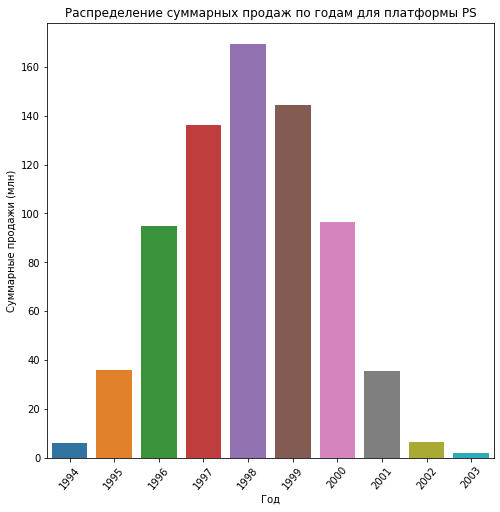

In [ ]:
platform_sales('PS')

Из топ-6 платформ данная является самой старой - она появилась в 1994 году. Пиковым периодом можно считать 1997-1999 гг.: в среднем 150 млн. проданных копий игр в году. Начиная с 2000 года продажи начали стремительно падать, вплоть до 2003 года.

### Выбор актуального периода для исследования и работа с актуальными данными для определения потенциально прибыльных платформ

Теперь определим характерный срок, за который появляются новые и исчезают старые платформы. Ранее мы определили 1994 год как начало важного для нас периода, поэтому будем вести расчет с этого года. К тому же, этот год совпадает с годом появления одной из топовых по продажам платформы PS. Посчитаем средний срок «жизни» каждой платформы за этот период, вычитая из года релиза последней игры для платформы год релиза первой игры для платформы, и прибавим к получившемуся значению 1, так как граница диапазона тоже должна входить в результат. Затем, возьмем медиану из получившихся значений.

In [ ]:
data_platform = (data_games.query('1994 <= year_of_release <= 2016')
            .pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index())
data_platform['time'] = data_platform['max'] - data_platform['min'] + 1
data_platform['time'].median()

6.0

Таким образом, мы проанализировали платформы, в том числе самые популярные, и благодаря анализу их показателей рассчитали, что характерный срок, за который появляются новые и исчезают старые платформы, составляет **6 лет.** Для анализа будущего года нам важен период, когда платформа либо растет, либо находится на пике, либо только начинает идти на спад, но все еще актуальна. Поэтому, для исследования возьмем половину от 6 лет, и определим актуальный период: **с 2014 года по 2016 год.**

In [ ]:
data_actually = data_games.query('year_of_release >= 2014').reset_index(drop=True)
data_actually

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1684,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
1685,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
1686,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
1687,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [ ]:
actual_sales = data_actually.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
actual_sales

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

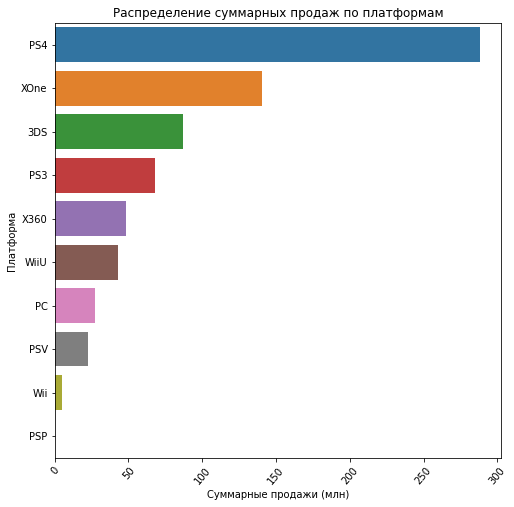

In [ ]:
plt.figure(figsize=(8, 8))
sns.barplot(x=actual_sales.values, y=actual_sales.index)
plt.title('Распределение суммарных продаж по платформам')
plt.xlabel('Суммарные продажи (млн)')
plt.ylabel('Платформа')
plt.xticks(rotation=50)
plt.show()

Для определения потенциально прибыльных платформ, возьмем топ по продажам, а именно следующие 3 платформы: *PS4, XOne, 3DS.* Повторим методику из прошлого пункта, и проанализируем эти платформы.

#### Распределение суммарных продаж по годам для платформы PS4

In [ ]:
ps4 = data_actually.query('platform == "PS4"').groupby('year_of_release')['total_sales'].sum()
ps4

year_of_release
2014    100.00
2015    118.90
2016     69.25
Name: total_sales, dtype: float64

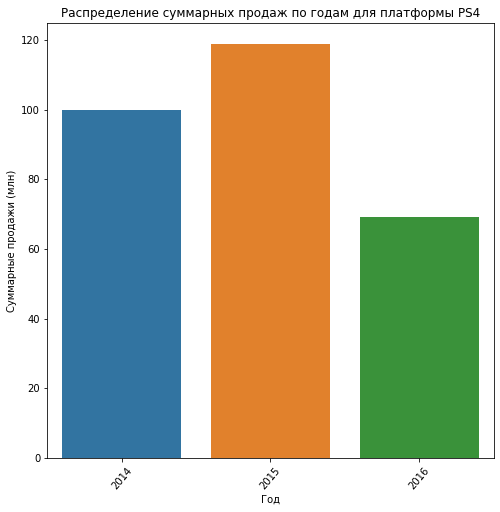

In [ ]:
plt.figure(figsize=(8, 8))
sns.barplot(x=ps4.index, y=ps4.values)
plt.title('Распределение суммарных продаж по годам для платформы PS4')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (млн)')
plt.xticks(rotation=50)
plt.show()

Платформа появилась недавно, в 2013 году, и мы видим, что с 2014 года она показала значительный рост продаж. Несмотря на то, что на графике виден спад в 2016 году, мы знаем, что данные за 2016 год неполные, а значит, беря во внимание 6-летний срок актуальности платформы, можем предположить, что платформа все еще будет актуальна для 2017 года.

#### Распределение суммарных продаж по годам для платформы XOne

In [ ]:
xone = data_actually.query('platform == "XOne"').groupby('year_of_release')['total_sales'].sum()
xone

year_of_release
2014    54.07
2015    60.14
2016    26.15
Name: total_sales, dtype: float64

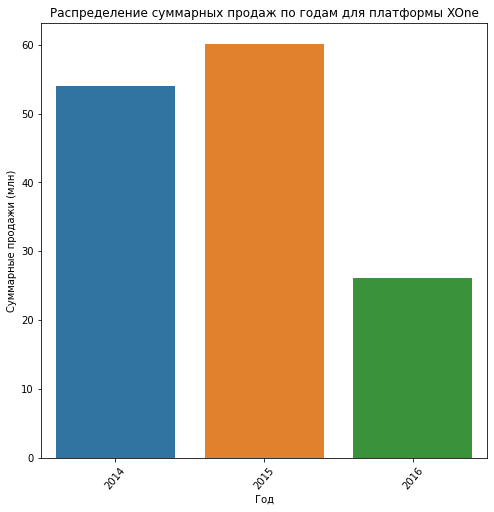

In [ ]:
plt.figure(figsize=(8, 8))
sns.barplot(x=xone.index, y=xone.values)
plt.title('Распределение суммарных продаж по годам для платформы XOne')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (млн)')
plt.xticks(rotation=50)
plt.show()

Платформа *XOne,* как и *PS4,* появилась в 2013 году, и тоже показала рост продаж на следующий год. Так как у нас нет полных данных за 2016 год, здесь будет точно такой же вывод - платформа для нас актуальна.

#### Распределение суммарных продаж по годам для платформы 3DS

In [ ]:
nintendo_3ds = data_actually.query('platform == "3DS"').groupby('year_of_release')['total_sales'].sum()
nintendo_3ds

year_of_release
2014    43.76
2015    27.78
2016    15.14
Name: total_sales, dtype: float64

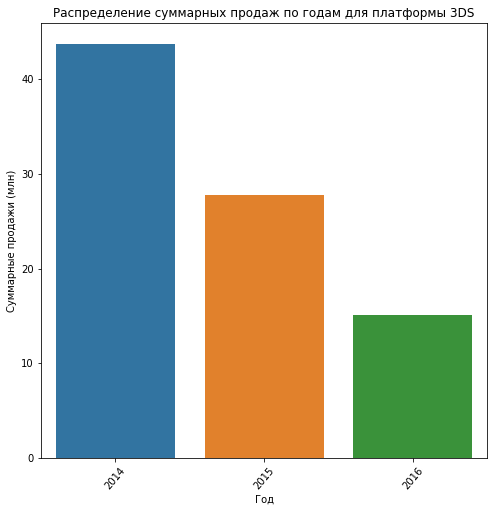

In [ ]:
plt.figure(figsize=(8, 8))
sns.barplot(x=nintendo_3ds.index, y=nintendo_3ds.values)
plt.title('Распределение суммарных продаж по годам для платформы 3DS')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (млн)')
plt.xticks(rotation=50)
plt.show()

Платформа *3DS,* в отличие от *PS4* и *XOne* показывает стабильное падение продаж, поэтому эту платформу мы не можем считать актуальной для 2016, и тем более 2017 года.

Таким образом, мы можем определить для себя 2 потенциально прибыльные платформы: *PS4* и *XOne. PS4* при этом является самой популярной платформой, и, соответственно, лидером продаж (почти **120 млн.** проданных копий игр в 2015 году).

### Глобальные продажи игр в разбивке по платформам

Построим для всех платформ диаграмму размаха («ящик с усами») и посмотрим на медианные значения продаж для каждой платформы.

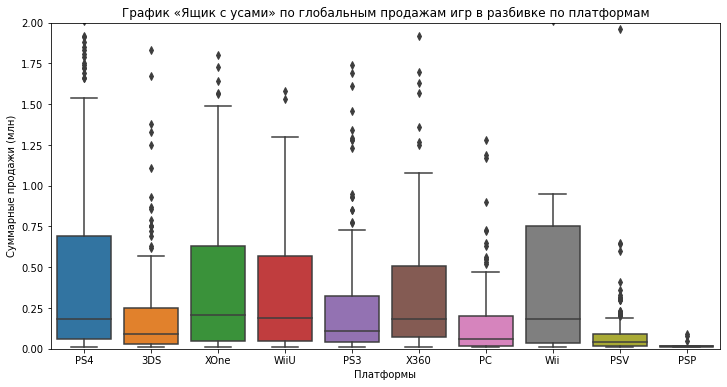

In [ ]:
plt.figure(figsize=(12, 6))
platform_boxplot = sns.boxplot(x='platform', y='total_sales', data=data_actually)
platform_boxplot.set_ylim(0, 2)

plt.title('График «Ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи (млн)')
plt.show()

В целом медианы продаж на каждой платформе не превышают значение в 0.25 млн. проданных копий. Почти половина платформ находятся близко к этому значению, а другая половина имеет значительно меньший показатель. Среди всех платформ по показателям наиболее выделяются следующие 5 платформ: *PS4, XOne, WiiU, X360, Wii.*

Большое количество выбросов можно объяснить тем, что периодически выходят игры, которые становятся очень популярными. Такие игры принято называть хитами по отношению к продажам.

### Построение диаграммы рассеяния и подсчет корреляции между отзывами и продажами

До этого мы выявили для себя 2 потенциально прибыльные платформы: *PS4* и *XOne. PS4* является более популярной, поэтому построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами внутри этих платформ. Для этого, создадим небольшую функцию.

In [ ]:
def platform_score(name, score):
    score_name = data_actually.query('platform == @name')
    score_name.plot(x=score, y='total_sales', kind='scatter', grid=True, alpha=0.5)
    plt.title('Диаграмма рассеяния для зависимости продаж от ' + score + ' внутри платформы ' + name)
    plt.xlabel(score)
    plt.ylabel('Суммарные продажи (млн)')
    plt.show()
    corr_score = score_name['total_sales'].corr(score_name[score])
    print(corr_score)

#### Влияние отзывов критиков и пользователей на продажи PS4

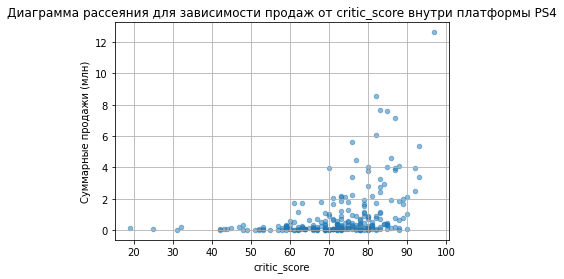

0.40266141068104083


In [ ]:
platform_score('PS4', 'critic_score')

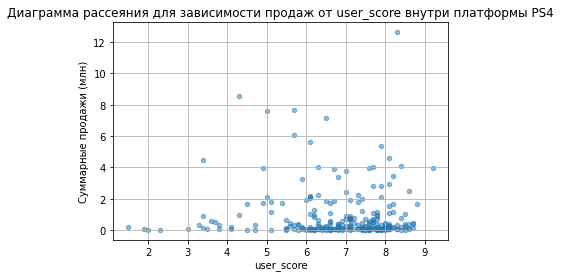

-0.040131589472697356


In [ ]:
platform_score('PS4', 'user_score')

Мы видим, что зависимость продаж от оценок критиков значительно выше, чем от оценок пользователей, которая является практически нулевой. Однако, и первая зависимость является средней, из-за чего можно сделать вывод, что на продажи в большей степени может влиять другой параметр. А серьезную разницу в зависимостях можно объяснить тем, что критики получают доступ к новым играм гораздо раньше обычных пользователей, и их предварительные оценки задают некий «тренд» для будущих продаж.

Для того, чтобы удостовериться в оценке зависимостей, проверим также корреляцию внутри второй актуальной для нас платформы - *XOne.*

#### Влияние отзывов критиков и пользователей на продажи XOne

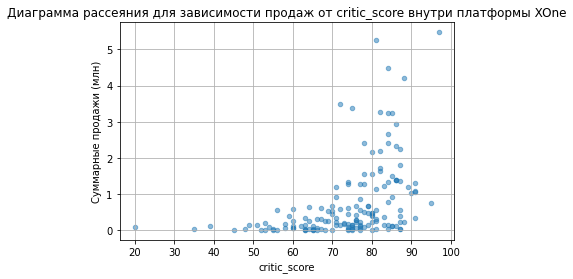

0.42867694370333226


In [ ]:
platform_score('XOne', 'critic_score')

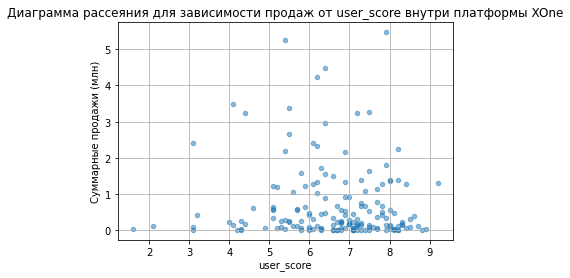

-0.0703839280647581


In [ ]:
platform_score('XOne', 'user_score')

Значения практически не отличаются, а значит и для этой платформы будут справедливыми сделанные выше выводы. Проверим еще пару платформ, чтобы закрепить результаты.

#### Влияние отзывов критиков и пользователей на продажи 3DS

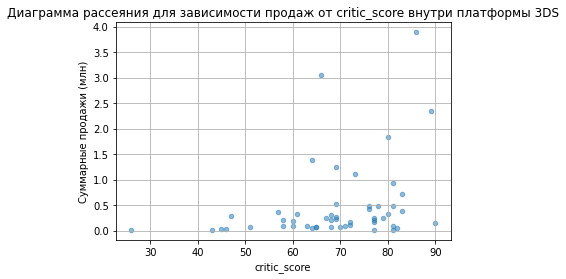

0.31411749286905105


In [ ]:
platform_score('3DS', 'critic_score')

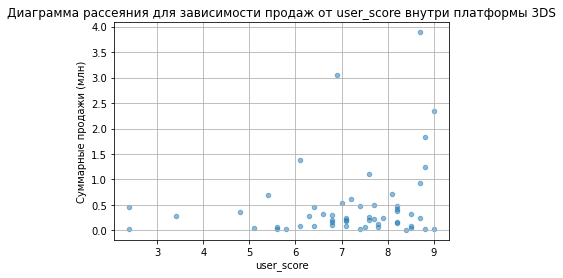

0.2151932718527028


In [ ]:
platform_score('3DS', 'user_score')

#### Влияние отзывов критиков и пользователей на продажи PS3

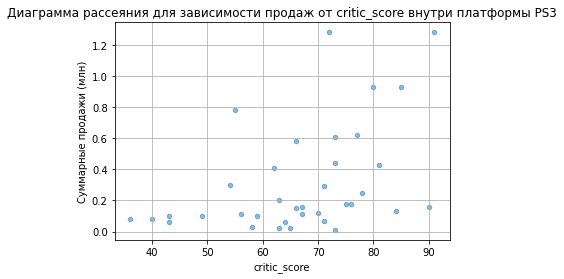

0.44657460493190704


In [ ]:
platform_score('PS3', 'critic_score')

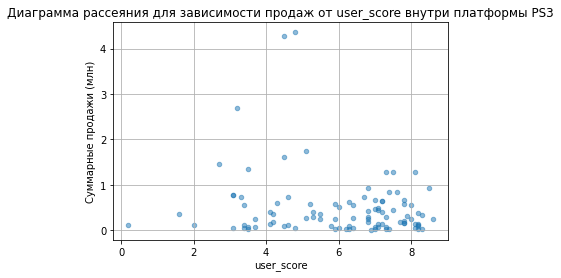

-0.16676141347662116


In [ ]:
platform_score('PS3', 'user_score')

Только для платформы *3DS* оценки пользователей показали чуть большее влияние на продажи, чем в остальных платформах, практически вплотную приблизившись к показателю корреляции оценки критиков. Однако, это скорее выбивающийся случай. Думаю, если проверить абсолютно все платформы, значения будут примерно одинаковыми, и в целом можно будет сделать единый вывод.

### Общее распределение игр по жанрам

In [ ]:
genre_counts = data_actually.groupby('genre')['name'].count().sort_values(ascending=False)
genre_counts

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: name, dtype: int64

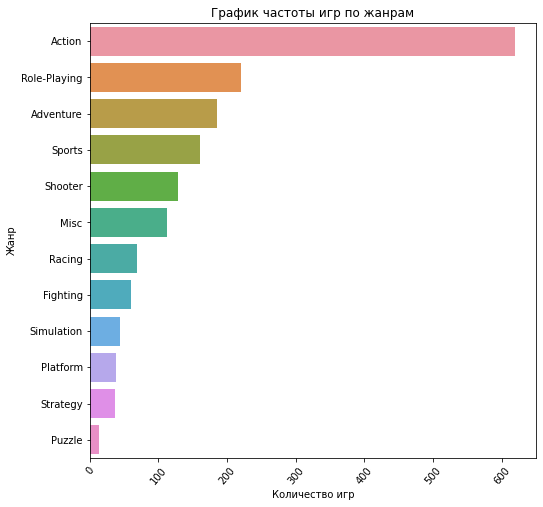

In [ ]:
plt.figure(figsize=(8, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('График частоты игр по жанрам')
plt.xlabel('Количество игр')
plt.ylabel('Жанр')
plt.xticks(rotation=50)
plt.show()

Мы видим, что с огромным отрывом, по количеству игр в жанре лидирует жанр **Action (619 игр).** Самый отстающий жанр по количеству игр - **Puzzle (14 игр).**

Теперь посмотрим, как распределяются продажи среди всех жанров.

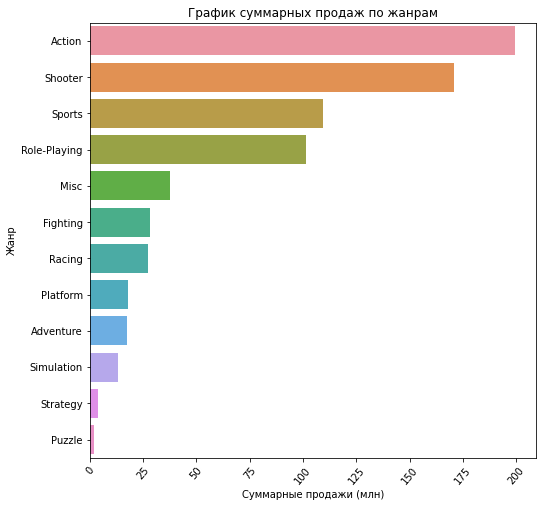

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64

In [ ]:
genre_sales = data_actually.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 8))
sns.barplot(x=genre_sales.values, y=genre_sales.index)
plt.title('График суммарных продаж по жанрам')
plt.xlabel('Суммарные продажи (млн)')
plt.ylabel('Жанр')
plt.xticks(rotation=50)
plt.show()
genre_sales

Мы видим что популярность жанра *Action* так же сказалось и на количестве продаж - **199.36 млн. проданных копий,** что составляет **27.33 % от всех продаж игр.** Точно такая же ситуация с непопулярным жанром *Puzzle* - самое малое количество продаж: **2.21 млн. проданных копий,** что составляет всего **0.3 % от всех продаж.**

Однако, есть и сюрпризы: при относительно малом количестве игр в жанре *Shooter (128 игр),* сумма продаж является впечатляющей - **170.94 млн. проданных копий (23.43 % от всех продаж).** А вот с жанром *Adventure (185 игр)* ситуация обратная - при относительно большом количестве выпущенных игр, количество продаж очень маленькое, и составляет **17.55 млн. проданных копий (2.41 % от всех продаж).**

В топ-3 по высоким продажам можно также выделить жанр *Sports (161 игра)* - **109.48 млн. проданных копий (15.01 % от всех продаж).** Близко к жанру *Puzzle* по низким продажам расположен жанр *Strategy (37 игр)* - **3.96 млн. проданных копий (0.54 % от всех продаж).**

Для продолжения анализа, перейдем к составлению портрета пользователя каждого региона.

## Шаг 4. Составление портрета пользователя каждого региона

### Самые популярные платформы в каждом регионе

Определим топ-5 самых популярных платформ для пользователей каждого региона *(NA, EU, JP),* и визуализируем полученные результаты.

In [ ]:
top5_platform_na = data_actually.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head().reset_index()
top5_platform_na

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


In [ ]:
top5_platform_eu = data_actually.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head().reset_index()
top5_platform_eu

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


In [ ]:
top5_platform_jp = data_actually.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head().reset_index()
top5_platform_jp

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


Для визуализации построим круговые диаграммы.

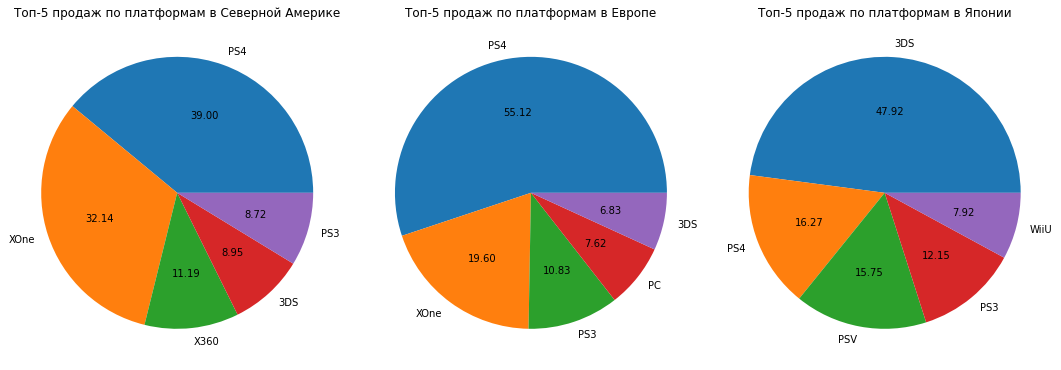

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 15))

axs[0].pie(top5_platform_na['na_sales'], labels=top5_platform_na['platform'], autopct='%.2f')
axs[0].set_title('Топ-5 продаж по платформам в Северной Америке')

axs[1].pie(top5_platform_eu['eu_sales'], labels=top5_platform_eu['platform'], autopct='%.2f')
axs[1].set_title('Топ-5 продаж по платформам в Европе')

axs[2].pie(top5_platform_jp['jp_sales'], labels=top5_platform_jp['platform'], autopct='%.2f')
axs[2].set_title('Топ-5 продаж по платформам в Японии')

plt.tight_layout()
plt.show()

Таким образом, мы видим что в Северной Америке и Европе ситуация по топ-5 практически идентична - ***PS4*** находится на первом месте с ***39 % (NA) и 55.12 % (EU).*** В Северной Америке недалеко ушла и ***XOne (32.14 %).*** Однако, в Европе платформа ***PS4*** сильнее преобладает над ***XOne (19.6 %).*** Это связано с тем, что ***XOne*** американская платформа, поэтому она пользуется спросом на родине.

А в Японии ситуация совершенно другая - в топ-5 находятся исключительно японские платформы, и лидирует там ***3DS (47.92 %). PS4 (16.27 %)*** лишь на втором месте с заметным отставанием.

### Самые популярные жанры в каждом регионе

Определим топ-5 самых популярных жанров для пользователей каждого региона *(NA, EU, JP),* и визуализируем полученные результаты.

In [ ]:
top5_genre_na = data_actually.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head().reset_index()
top5_genre_na

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


In [ ]:
top5_genre_eu = data_actually.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head().reset_index()
top5_genre_eu

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


In [ ]:
top5_genre_jp = data_actually.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head().reset_index()
top5_genre_jp

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


Применим такую же методику, как и для топ-5 платформ - построим круговые диаграммы.

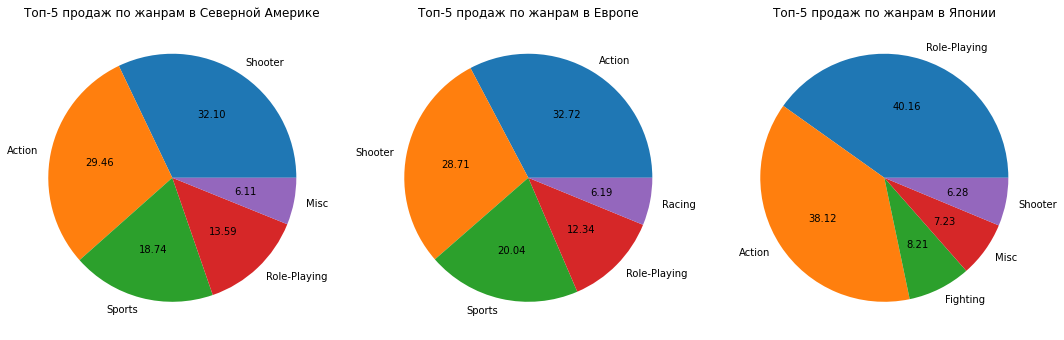

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 15))

axs[0].pie(top5_genre_na['na_sales'], labels=top5_genre_na['genre'], autopct='%.2f')
axs[0].set_title('Топ-5 продаж по жанрам в Северной Америке')

axs[1].pie(top5_genre_eu['eu_sales'], labels=top5_genre_eu['genre'], autopct='%.2f')
axs[1].set_title('Топ-5 продаж по жанрам в Европе')

axs[2].pie(top5_genre_jp['jp_sales'], labels=top5_genre_jp['genre'], autopct='%.2f')
axs[2].set_title('Топ-5 продаж по жанрам в Японии')

plt.tight_layout()
plt.show()

И в данном случае ситуация в топ-5 в Северной Америке и Европе практически одинаковая. Однако, первые два места распределились по разному - в Северной Америке на первом месте жанр ***Shooter (32.1 %),*** на втором месте ***Action (29.46 %);*** в Европе же наоборот - ***32.72 % у жанра Action*** против ***28.71 % у жанра Shooter.*** Не отстает и жанр ***Sports - на третьем месте в обоих регионах.***

В Японии как всегда, своя атмосфера. На первом месте здесь жанр ***Role-Playing (40.16 %).*** Недалеко, на втором месте, как и в Северной Америке, расположился жанр ***Action (38.12 %).*** Остальные жанры далеко позади, в том числе и непопулярный в данном регионе жанр ***Shooter (6.28 %).***

### Влияние рейтинга ESRB на продажи в регионе

Рейтинг ESRB предназначен для маркировки игр, выпущенных в США и Канаде. Для игр в Японии и Европе существуют свои рейтинги. Отсюда можно сделать вывод, что пропуски в датасете в столбце рейтинга во многом связаны именно с тем, что рейтинг ESRB не используется для игр в Европе и Японии. Поэтому не будем убирать значение *unknown* из графиков, так как это могут быть рейтинги PEGI (Европа) и CERO (Япония).

Так как рейтинг категориальная переменная, для проверки степени влияния рейтинга на продажи мы не можем построить диаграмму рассеяния и рассчитать корреляцию. Поэтому, выведем сумму продаж отдельно по каждому региону для каждого рейтинга, и посмотрим на получившиеся графики.

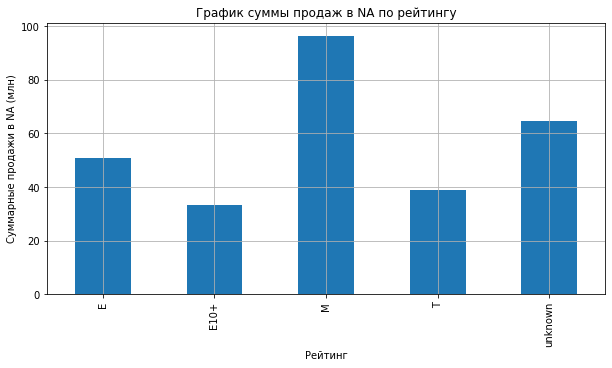

In [ ]:
(
    data_actually.pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .plot(y='na_sales', kind='bar', figsize=(10, 5), grid=True, legend=False)
)
plt.title('График суммы продаж в NA по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Суммарные продажи в NA (млн)')
plt.show()

Мы видим, что в NA игры, отмеченные рейтингом *M (Mature 17+),* имеют больший объем продаж, чем остальные игры. Это можно объяснить тем, что основная аудитория игр - совершеннолетние и взрослые.

Также выделяются игры с рейтингами *E (Everyone)* и *unknown (напоминаю, что это могут быть рейтинги от PEGI или CERO).* Проверим остальные регионы, и посмотрим, сохраняется ли зависимость, или это просто случайность, и рейтинг никак не влияет на продажи.

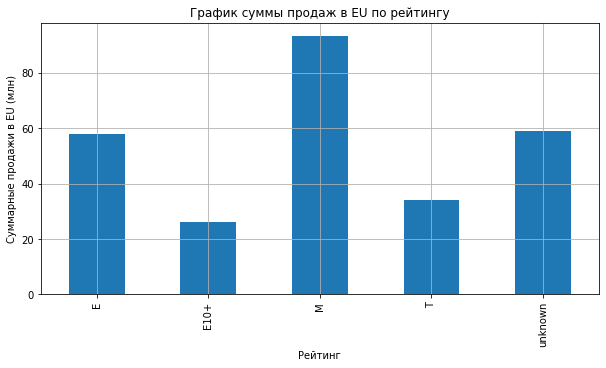

In [ ]:
(
    data_actually.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .plot(y='eu_sales', kind='bar', figsize=(10, 5), grid=True, legend=False)
)
plt.title('График суммы продаж в EU по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Суммарные продажи в EU (млн)')
plt.show()

В регионе EU сохраняется точно такая же зависимость. Для закрепления проверим регион JP.

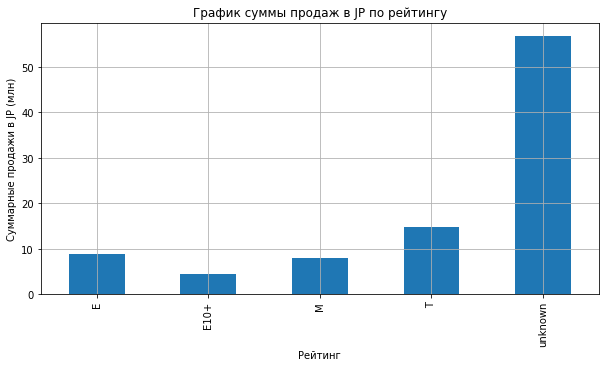

In [ ]:
(
    data_actually.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .plot(y='jp_sales', kind='bar', figsize=(10, 5), grid=True, legend=False)
)
plt.title('График суммы продаж в JP по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Суммарные продажи в JP (млн)')
plt.show()

В регионе JP покупаются игры в подавляющим большинстве со значением *unknown*, что наводит нас на мысли, что это местные игры с рейтингами от CERO. В таком случае, можно сделать вывод о менталитете местных пользователей, которые предпочитают лишь определенные игры.

Таким образом, в регионах NA и EU можно заметить некоторую зависимость между рейтингом и продажами игр в этих регионах. Для региона JP характерна совершенно другая тенденция: игры покупаются в основном с одним рейтингом. Однако, это лишь еще больше подтверждает зависимость продаж от рейтинга.

Теперь проверим некоторые гипотезы на основании нашего исследования.

## Шаг 5. Проверка гипотез

Перед проверкой гипотез избавимся от отрицательных значений.

In [ ]:
platform_xone_user = data_actually.query('platform == "XOne" and user_score > 0')['user_score']
platform_pc_user = data_actually.query('platform == "PC" and user_score > 0')['user_score']

Первая гипотеза - средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые.

Нулевая гипотеза (H0) - средние пользовательские рейтинги платформ *Xbox One* и *PC* равны. Альтернативная гипотеза (H1) - средние пользовательские рейтинги платформ *Xbox One* и *PC* не равны.

Для проверки гипотезы воспользуемся двухвыборочным тестом для независимых выборок с двусторонней гипотезой.

In [ ]:
print('Среднее первой выборки:', np.mean(platform_xone_user))
print('Среднее второй выборки:', np.mean(platform_pc_user))

alpha = .05

results = st.ttest_ind(platform_xone_user, platform_pc_user)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее первой выборки: 6.594545454545456
Среднее второй выборки: 6.298360655737705
p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Мы получили немаленькое значение *p-value* и не можем отвергнуть нулевую гипотезу. А значит, с большой долей вероятности, средние пользовательские рейтинги платформ **Xbox One (6.59)** и **PC (6.3)** не имеют статистически значимых отличий.

In [ ]:
genre_action_user = data_actually.query('genre == "Action" and user_score > 0')['user_score']
genre_sports_user = data_actually.query('genre == "Sports" and user_score > 0')['user_score']

Вторая гипотеза - средние пользовательские рейтинги жанров *Action* и *Sports* разные.

Нулевая гипотеза (H0) - средние пользовательские рейтинги жанров *Action* и *Sports* равны. Альтернативная гипотеза (H1) - средние пользовательские рейтинги жанров *Action* и *Sports* не равны.

Для проверки гипотезы воспользуемся двухвыборочным тестом для независимых выборок с двусторонней гипотезой.

In [ ]:
print('Среднее первой выборки:', np.mean(genre_action_user))
print('Среднее второй выборки:', np.mean(genre_sports_user))

alpha = .05

results = st.ttest_ind(genre_action_user, genre_sports_user)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее первой выборки: 6.760606060606061
Среднее второй выборки: 5.2251968503937
p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Мы получили низкое значение *p-value,* и при уровне статистической значимости *alpha* 5 %, и при уровне 1 %, отвергаем нулевую гипотезу. А значит, скорее всего пользовательские рейтинги жанров **Action (6.76)** и **Sports (5.23)** не равны.

Нулевая и альтернативная гипотеза были сформулированы исходя из того, что в нулевой гипотезе всегда должен стоять знак равенства.

Для проверки гипотез применили двухвыборочный тест для независимых выборок с двусторонней гипотезой. Двухвыборочный тест - так как сравниваем истинное среднее двух массивов данных. Для независимых данных - так как данные разные, и не зависят друг от друга. Двусторонняя гипотеза - так как нам нужно определить разность (неважно, в большую или меньшую сторону).

## Шаг 6. Общий вывод

Мы провели исследование базы данных продаж интернет-магазина «Стримчик» с 1980 по 2016 гг. Сделано это было с целью спланировать рекламную кампанию на 2017 год. После анализа имеющихся данных, мы можем сделать некоторые ключевые выводы:

- характерный срок, за который появляются новые и исчезают старые платформы, составляет **6 лет.**
- актуальный для нас период для анализа и планирования на 2017 год: **с 2014 года по 2016 год.**
- потенциально прибыльными мы отметили для себя 2 платформы: **PS4 и XOne.**
- лидером по количеству игр **(619)** и сумме продаж **(199.36)** является жанр **Action.**

Также, мы смогли составить портрет пользователя в каждом регионе:

- в Северной Америке и Европе: пользователь с платформой **PS4 или XOne,** играющий в игры жанров **Action и Shooter,** имеющих рейтинг **M.**
- в Японии: пользователь с платформой **3DS,** играющий в японские игры жанров **Role-Playing и Action.**

Исходя из портрета пользователя, можно дать следующие рекомендации отделу маркетинга для проведения рекламной кампании в 2017 году:

- рекомендуемые платформы: **PS4 и XOne.**
- рекомендуемые жанры: **Action, Shooter и Role-Playing.**
- во внимание стоит принять рейтинг игры, и обратить внимание на рейтинг **M (Mature).** Также, можно взять во внимание оценки критиков. На оценки пользователей обращать внимание нет смысла.

В дополнение, были проверены две гипотезы, для определения и сравнения средних рейтингов пользователей. Благодаря проверке были получены следующие данные:

- средний пользовательский рейтинг платформы **XOne (6.59)** и средний пользовательский рейтинг платформы **PC (6.3)** с большой долей вероятности не имеют статистически значимых отличий.
- средний пользовательский рейтинг жанра **Action (6.76)** и средний пользовательский рейтинг жанра **Sports (5.23)** скорее всего не равны.

Таким образом, на основании сделанных выводов можно спланировать рекламную кампанию на 2017 год. Возможно, интернет-магазину стоит сделать упор на Северную Америку и Европу. Однако, полученные результаты могут быть не самыми точными, так как в исходных данных имелось много пропущенных значений, и различия в оценках могут на самом деле быть совершенно другими. Можно порекомендовать не оставлять пропуски, а также быть более внимательными при составлении базы данных, и не допускать дубликатов, в том числе и неявных. Благо, в проанализированных данных обнаружен всего 1, и его наличие никак не исказило бы результаты.